In [1]:
using Pkg
Pkg.activate("/media/mat/HDD/AdaptiveTransportMap/")

 Activating environment at `/media/mat/HDD/AdaptiveTransportMap/Project.toml`


In [2]:
using Revise
using AdaptiveTransportMap
using LinearAlgebra
import LinearAlgebra: ldiv!, dot
using Test
using ForwardDiff
using BenchmarkTools
using QuadGK
using Distributions
using Random
using LoopVectorization
using Test
using SparseArrays
using Test

┌ Info: Precompiling AdaptiveTransportMap [bdf749b0-1400-4207-80d3-e689c0e3f03d]
└ @ Base loading.jl:1278
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116


In [6]:
X = randn(5, 100).*randn(5,100)

5×100 Array{Float64,2}:
  0.174142  -0.228841  -0.33808    …   0.179001   0.776524   -0.533814
  0.483627  -0.404337   0.0625828     -0.333661   1.62103    -0.048834
 -0.175287  -0.157594   0.308717       0.576772   0.0834875   0.0698824
  0.371182  -2.56944   -1.44139        0.0591953  0.450546   -0.309073
  0.158701   0.544221   0.308342      -0.302856   1.0445     -0.891847

In [7]:
m = 20
S = HermiteMap(m, X; diag = true)

HermiteMap(20, 5, LinearTransform(5, [-0.011292152339711623, -0.027162589237376626, -0.0027344050973915164, -0.04017531394715764, -0.07082677479285848], [0.8679210209290723 0.0 … 0.0 0.0; 0.0 1.0126154338728213 … 0.0 0.0; … ; 0.0 0.0 … 1.0173331461943116 0.0; 0.0 0.0 … 0.0 0.9783998040948588], true), MapComponent[Map component of dimension 1 with Nψ 1 active features
, Map component of dimension 2 with Nψ 1 active features
, Map component of dimension 3 with Nψ 1 active features
, Map component of dimension 4 with Nψ 1 active features
, Map component of dimension 5 with Nψ 1 active features
])

In [8]:
optimize(S, X, "kfolds"; verbose = true, withqr = true, conditioner = true)

1 terms - Training error: 1.4845551999314908, Validation error: 1.1314718662974004
1 terms - Training error: 1.4845241456828455, Validation error: 1.1319378014267694
2 terms - Training error: 1.3956839924292017, Validation error: 0.9811755575820928
3 terms - Training error: 1.395606296263031, Validation error: 0.9802205292281123
4 terms - Training error: 1.3142003012212167, Validation error: 0.9835254075340518
5 terms - Training error: 1.3089933702247403, Validation error: 0.9969596615780799
6 terms - Training error: 1.2937329440804355, Validation error: 1.024208785188265
7 terms - Training error: 1.2935579866962004, Validation error: 1.0223524938506967
8 terms - Training error: 1.2570737109079702, Validation error: 0.9780798286578682
9 terms - Training error: 1.1931038841527033, Validation error: 0.9534951876464409
10 terms - Training error: 1.1851749867767598, Validation error: 0.9913568946256582
1 terms - Training error: 1.5127764796453513, Validation error: 1.0185867474419585
1 ter

Progress:  20%|████████▎                                |  ETA: 0:00:01

8 terms - Training error: 1.0494973265040406, Validation error: 2.7288594869630542
9 terms - Training error: 1.0249780540572602, Validation error: 1.802513334538599
10 terms - Training error: 0.9971766954522665, Validation error: 13.775028503255433
1 terms - Training error: 1.4139385332046726
1 terms - Training error: 1.4139275380267458
2 terms - Training error: 1.3120568337135348
3 terms - Training error: 1.3116761220080897
4 terms - Training error: 1.2469490793898041
5 terms - Training error: 1.2449194855345904
6 terms - Training error: 1.2373130621589792
7 terms - Training error: 1.236607875395088
8 terms - Training error: 1.197807872571554
9 terms - Training error: 1.142055405735339
10 terms - Training error: 1.1406759336026262
1 terms - Training error: 1.4966357005835038, Validation error: 1.08314986368935
1 terms - Training error: 1.4965818953198842, Validation error: 1.083792604673339
2 terms - Training error: 1.4174201104075153, Validation error: 0.890191388862926
3 terms - Tra

Progress:  60%|████████████████████████▋                |  ETA: 0:00:00

10 terms - Training error: 1.1136706082049308, Validation error: 1.3337257944465293
1 terms - Training error: 1.5104094645127888, Validation error: 1.0280548079722087
1 terms - Training error: 1.5098370019905858, Validation error: 1.0295043554088716
2 terms - Training error: 1.4402306534088785, Validation error: 0.7961913160860739
3 terms - Training error: 1.4362244638293375, Validation error: 0.821434364824304
4 terms - Training error: 1.2960380561126246, Validation error: 0.7978405610698371
5 terms - Training error: 1.2744375274525448, Validation error: 0.7491322369278725
6 terms - Training error: 1.257360122980213, Validation error: 0.755582350355224
7 terms - Training error: 1.2495662341981812, Validation error: 0.7300333573023478
8 terms - Training error: 1.248586940343878, Validation error: 0.7246558690210707
9 terms - Training error: 1.2467666592066349, Validation error: 0.7119731414677667
10 terms - Training error: 1.222263685694197, Validation error: 0.7012861305277208
1 terms

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


10 terms - Training error: 1.125701032454863, Validation error: 1.5474923645759684
1 terms - Training error: 1.4948887862892648, Validation error: 1.0901375208663027
1 terms - Training error: 1.4928960437095964, Validation error: 1.0906938195807094
2 terms - Training error: 1.4338869153618377, Validation error: 1.1239116418384782
3 terms - Training error: 1.419145742513544, Validation error: 1.1224572983410204
4 terms - Training error: 1.3671258037172724, Validation error: 0.9608536777425603
5 terms - Training error: 1.3651228297086129, Validation error: 0.9508820770720646
6 terms - Training error: 1.362145666981082, Validation error: 0.9375242866361988
7 terms - Training error: 1.250102003340745, Validation error: 0.9018640667133663
8 terms - Training error: 1.248623092213491, Validation error: 0.896234660155679
9 terms - Training error: 1.2422258855006891, Validation error: 0.8741107027642815
10 terms - Training error: 1.2409872854788917, Validation error: 0.8639371398841635
1 terms 

HermiteMap(20, 5, LinearTransform(5, [-0.011292152339711623, -0.027162589237376626, -0.0027344050973915164, -0.04017531394715764, -0.07082677479285848], [0.8679210209290723 0.0 … 0.0 0.0; 0.0 1.0126154338728213 … 0.0 0.0; … ; 0.0 0.0 … 1.0173331461943116 0.0; 0.0 0.0 … 0.0 0.9783998040948588], true), MapComponent[Map component of dimension 1 with Nψ 10 active features
, Map component of dimension 2 with Nψ 5 active features
, Map component of dimension 3 with Nψ 7 active features
, Map component of dimension 4 with Nψ 1 active features
, Map component of dimension 5 with Nψ 9 active features
])

In [9]:
F = evaluate(S, X; start = 3)

5×100 Array{Float64,2}:
  0.0         0.0         0.0       …   0.0       0.0         0.0
  0.0         0.0         0.0           0.0       0.0         0.0
 -0.163734   -0.0454737   0.502016      0.693331  0.0509695   0.212076
  0.446863   -2.44363    -1.33521       0.138486  0.525002   -0.221662
  0.0930772   1.37651     0.989198     -0.588954  0.875015   -1.07411

In [11]:
ystar = [1.0; -0.5]
Ystar = repeat(ystar, 1, 100)

2×100 Array{Float64,2}:
  1.0   1.0   1.0   1.0   1.0   1.0  …   1.0   1.0   1.0   1.0   1.0   1.0
 -0.5  -0.5  -0.5  -0.5  -0.5  -0.5     -0.5  -0.5  -0.5  -0.5  -0.5  -0.5

In [13]:
?inverse!

search: inverse! inverse InverseGamma InverseWishart InverseGaussian vinverse



No documentation found.

`AdaptiveTransportMap.inverse!` is a `Function`.

```
# 5 methods for generic function "inverse!":
[1] inverse!(result, g::Rectifier, x) in AdaptiveTransportMap at /media/mat/HDD/AdaptiveTransportMap/src/mapcomponent/rectifier.jl:87
[2] inverse!(X, F, R::IntegratedFunction, S::Storage) in AdaptiveTransportMap at /media/mat/HDD/AdaptiveTransportMap/src/mapcomponent/inverse.jl:43
[3] inverse!(X, F, C::MapComponent, S::Storage) in AdaptiveTransportMap at /media/mat/HDD/AdaptiveTransportMap/src/mapcomponent/inverse.jl:80
[4] inverse!(X::Array{Float64,2}, F, L::LinMapComponent, S::Storage) in AdaptiveTransportMap at /media/mat/HDD/AdaptiveTransportMap/src/mapcomponent/inverse.jl:83
[5] inverse!(F, M::HermiteMap, X, Ystar; apply_rescaling, start, P) in AdaptiveTransportMap at /media/mat/HDD/AdaptiveTransportMap/src/mapcomponent/hermitemap.jl:361
```


In [ ]:
Xpost = deepcopy(X)

inverse(Xpost, F, )

### Hessian of the log pdf

In [42]:
# @testset "Verify grad_x_log_pdf and hess_x_log_pdf function Nx = 1 for LinearMap" begin

Nx = 1
Ne = 100
X = randn(Nx, Ne)
X = zeros(X)
m = 10
B = MultiBasis(CstProHermite(3), Nx)

idx = reshape([0], (1,1))

coeff =  abs.(randn(size(idx,1)))

C = MapComponent(m, Nx)#, idx, coeff)

# C, _ = optimize(C, X, nothing; withqr = true)

dxlogC  = grad_x_log_pdf(C, X)
d2xlogC = hess_x_log_pdf(C, X)

function evaluatef0(x)
    y = copy(x)
    y[end] = 0.0
    return C.I.f.f(y)
end

integrand(t,x) = C.I.g(ForwardDiff.gradient(y->C.I.f.f(y), vcat(x[1:end-1],t*x[end]))[end])

function Ct(x)
    lb = 0.0
    ub = 1.0
    prob = QuadratureProblem(integrand,lb,ub,x)
    out = evaluatef0(x) + x[end]*solve(prob,CubatureJLh(),reltol=1e-8,abstol=1e-8)[1]
    return out
end

log_pdfCt(x) = log_pdf(Ct(x)) + log(C.I.g(ForwardDiff.gradient(z->C.I.f.f(z),x)[end]))

log_pdfCt (generic function with 1 method)

In [50]:

@testset "Verify grad_x_log_pdf and hess_x_log_pdf function Nx = 1" begin

  Nx = 1
  Ne = 100
  X = randn(Nx, Ne)
  X = zeros(X)
  m = 10
  B = MultiBasis(CstProHermite(3), Nx)

  idx = reshape([0; 1; 2; 3], (4,1))

  coeff =  randn(size(idx,1))

  C = MapComponent(m, Nx, idx, coeff)

  dxlogC  = grad_x_log_pdf(C, X)
  d2xlogC = hess_x_log_pdf(C, X)

  function evaluatef0(x)
    y = copy(x)
    y[end] = 0.0
    return C.I.f.f(y)
  end

  integrand(t,x) = C.I.g(ForwardDiff.gradient(y->C.I.f.f(y), vcat(x[1:end-1],t*x[end]))[end])

  function Ct(x)
      lb = 0.0
      ub = 1.0
      prob = QuadratureProblem(integrand,lb,ub,x)
      out = evaluatef0(x) + x[end]*solve(prob,CubatureJLh(),reltol=1e-6,abstol=1e-6)[1]
      return out
  end

  log_pdfCt(x) = log_pdf(Ct(x)) + log(C.I.g(ForwardDiff.gradient(z->C.I.f.f(z),x)[end]))

  @inbounds for i=1:Ne
    @test norm(ForwardDiff.gradient(log_pdfCt, member(ens,i)) - dxlogC[i,:])<1e-8
  end

  @inbounds for i=1:Ne
    @test norm(FiniteDiff.finite_difference_hessian(log_pdfCt, member(ens,i)) - d2xlogC[i,:,:])<1e-6
  end

end

Test Summary:                                            | Pass  Total
Verify grad_x_log_pdf and hess_x_log_pdf function Nx = 1 |  200    200


Test.DefaultTestSet("Verify grad_x_log_pdf and hess_x_log_pdf function Nx = 1", Any[], 200, false)

In [43]:
X[:,2]

1-element Array{Float64,1}:
 0.1177859902603023

In [44]:
ForwardDiff.gradient(log_pdfCt, X[:,2])

1-element Array{Float64,1}:
 -0.1177859902603023

In [47]:
[ForwardDiff.gradient(log_pdfCt, X[:,j]) for j = 1:Ne]

100-element Array{Array{Float64,1},1}:
 [0.201210910185704]
 [NaN]
 [NaN]
 [-0.9654513492305823]
 [NaN]
 [NaN]
 [NaN]
 [1.0003800815557313]
 [NaN]
 [1.6807723290204686]
 [0.40024327666570614]
 [-0.7802153849463408]
 [-0.39368836431974685]
 ⋮
 [0.32296806085442226]
 [1.296860851960196]
 [NaN]
 [1.409488711148486]
 [NaN]
 [-0.6933752093191765]
 [NaN]
 [NaN]
 [-0.8299910205120611]
 [NaN]
 [NaN]
 [NaN]

In [18]:

  for i=1:Ne
    @show ForwardDiff.gradient(log_pdfCt, X[:,1])
    @test norm(ForwardDiff.gradient(log_pdfCt, X[:,i]) - dxlogC[i,:])<1e-8
  end

#   @inbounds for i=1:Ne
#     @test norm(FiniteDiff.finite_difference_hessian(log_pdfCt, member(ens,i)) - d2xlogC[i,:,:])<1e-6
#     @test norm(d2xklogC[i,:,:] - [-1.0])<1e-6
#   end


ForwardDiff.gradient(log_pdfCt, X[:, 1]) = [NaN]
ForwardDiff.gradient(log_pdfCt, X[:, 1]) = [-0.7991735521869873]
ForwardDiff.gradient(log_pdfCt, X[:, 1]) = [NaN]
ForwardDiff.gradient(log_pdfCt, X[:, 1]) = [NaN]
Test Failed at In[18]:4
  Expression: norm(ForwardDiff.gradient(log_pdfCt, X[:, i]) - dxlogC[i, :]) < 1.0e-8
   Evaluated: NaN < 1.0e-8


LoadError: There was an error during testing

In [72]:
m = 20
Nx = 2
X  =  Matrix([0.267333   1.43021;
      0.364979   0.607224;
     -1.23693    0.249277;
     -2.0526     0.915629;
     -0.182465   0.415874;
      0.412907   1.01672;
      1.41332   -0.918205;
      0.766647  -1.00445]');

In [73]:
C = MapComponent(m, Nx)

MapComponent(20, 1, 2, IntegratedFunction(20, 1, 2, Rectifier("softplus"), ParametricFunction(ExpandedFunction(20, 1, 2, MultiBasis(Basis of 20 functions: Constant -> 18th degree Probabilistic Hermite function
, 2), [0 0], [2], [0.0]))), 1.0e-6)

In [74]:
C, _ = optimize(C, X, nothing; withqr = true)

(MapComponent(20, 1, 2, IntegratedFunction(20, 1, 2, Rectifier("softplus"), ParametricFunction(ExpandedFunction(20, 1, 2, MultiBasis(Basis of 20 functions: Constant -> 18th degree Probabilistic Hermite function
, 2), [0 0], [2], [-0.33903419693160614]))), 1.0e-6), 1.2598055802563939)

In [75]:
function evaluatef0(x)
    y = copy(x)
    y[end] = 0.0
    return C.I.f.f(y)
end

  integrand(t,x) = C.I.g(ForwardDiff.gradient(y->C.I.f.f(y), vcat(x[1:end-1],t*x[end]))[end])

function Ct(x)
    lb = 0.0
    ub = 1.0
    prob = QuadratureProblem(integrand,lb,ub,x)
    out = evaluatef0(x) + x[end]*solve(prob,CubatureJLh(),reltol=1e-6,abstol=1e-6)[1]
    return out
end

log_pdfCt(x) = log_pdf(Ct(x)) + log(C.I.g(ForwardDiff.gradient(z->C.I.f.f(z),x)[end]))

log_pdfCt (generic function with 1 method)

In [76]:
evaluatef0([1.5; 2.5])

-0.33903419693160614

In [67]:
ForwardDiff.gradient(log_pdfCt, X[:,1])

2-element Array{Float64,1}:
 -5.26036538691273e-310
 -1.0911758030683938

In [68]:
Glogπ = grad_x_log_pdf(C, X)

8×2 Array{Float64,2}:
 0.0  -1.09118
 0.0  -0.26819
 0.0   0.0897572
 0.0  -0.576595
 0.0  -0.0768398
 0.0  -0.677686
 0.0   1.25724
 0.0   1.34348

In [58]:
fi = MultiFunction(C.I.f.f.B, C.I.f.f.idx[1,:])

MultiFunction(20, 2, MultiBasis(Basis of 20 functions: Constant -> 18th degree Probabilistic Hermite function
, 2), [0, 0])

In [60]:
fi([2.0; 2.0])

1.0

In [69]:
FiniteDiff.finite_difference_hessian(log_pdfCt, X[:,1])

2×2 Symmetric{Float64,Array{Float64,2}}:
 0.0   0.0
 0.0  -1.0

In [70]:
Hlogπ[1,:,:]

2×2 Array{Float64,2}:
 0.0   0.0
 0.0  -1.0

In [6]:
isposdef(cov(EnsembleState(X)))

true

In [61]:
C = MapComponent(m, Nx)

MapComponent(20, 1, 2, IntegratedFunction(20, 1, 2, Rectifier("softplus"), ParametricFunction(ExpandedFunction(20, 1, 2, MultiBasis(Basis of 20 functions: Constant -> 18th degree Probabilistic Hermite function
, 2), [0 0], [2], [0.0]))), 1.0e-6)

In [38]:
C, error = optimize(C, X, "kfold"; withqr = true)

(MapComponent(10, 8, 1, IntegratedFunction(10, 8, 1, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 8, 1, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 1), [1; 2; … ; 7; 8], [1], [-1.9863602640078377, 1.8127483538164104, -4.376792090291415, 5.715291285428986, -7.0464413794236584, 7.386641015151966, -2.7133865627264795, 3.758412010867771]))), 1.0e-6), [1.6099093860019014, 1.2845293768950448, 1.2644715341526565, 1.2510778137207634, 1.234865767424318, 1.178952843906016, 1.1787248122528688, 1.1652226566687478, 1.1533995121751501])

In [63]:
C([1.5; 4.0])

1-element Array{Float64,1}:
 4.0

In [42]:
ForwardDiff.jacobian(x->log_pdf(C, reshape(x,(1,1))), X[:,1])

LoadError: MethodError: no method matching vander!(::SubArray{Float64,2,Array{Float64,2},Tuple{Base.Slice{Base.OneTo{Int64}},UnitRange{Int64}},true}, ::PhyHermite, ::Int64, ::Array{ForwardDiff.Dual{ForwardDiff.Tag{var"#7#8",Float64},Float64,1},1})
Closest candidates are:
  vander!(::Any, !Matched::PhyPolyHermite, ::Int64, ::Any) at /media/mat/HDD/AdaptiveTransportMap/src/hermitefunction/phypolyhermite.jl:164
  vander!(::Any, !Matched::ProPolyHermite, ::Int64, ::Any) at /media/mat/HDD/AdaptiveTransportMap/src/hermitefunction/propolyhermite.jl:160
  vander!(::Any, ::PhyHermite, ::Int64, !Matched::Array{Float64,1}) at /media/mat/HDD/AdaptiveTransportMap/src/hermitefunction/phyhermite.jl:209
  ...

In [8]:
@time optimize(M, X, 10; withqr = true);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


 22.973612 seconds (54.71 M allocations: 2.857 GiB, 3.39% gc time)


In [28]:
Hlog = -mean(hess_x_log_pdf(M, X); dims = 1)[1,:,:]

10×10 Array{Float64,2}:
  4.85641    -0.189815    -0.0691186   …  -0.0          -0.0
 -0.189815    4.43871      0.0815214      -0.0           0.360752
 -0.0691186   0.0815214    4.28361         0.102006     -0.0
 -0.196781   -0.00744115  -0.00120541      0.000987349  -0.0
 -0.0819975  -0.0454782    0.0261993       0.1244       -0.0128511
  0.0710787  -0.0937224    0.184891    …  -0.0           0.00644267
 -0.0        -0.347571    -0.0352235      -0.265881      0.0651867
 -0.0        -0.269528    -0.0            -0.0           0.16098
 -0.0        -0.0          0.102006        1.0          -0.0
 -0.0         0.360752    -0.0            -0.0           1.0

In [31]:
getidx(M[10])

10×10 Array{Int64,2}:
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  2  0  0  0
 0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  2  0  0
 0  1  0  0  0  0  0  0  0  0
 0  2  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0
 0  3  0  0  0  0  0  0  0  0
 0  4  0  0  0  0  0  0  0  0

In [29]:
eigen(Hlog)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
10-element Array{Float64,1}:
 0.8457892929344761
 0.9475515738668099
 1.0607887751950456
 1.504198313316906
 2.2091790575377894
 2.3820576748741082
 3.674881831617114
 4.274372916636648
 4.523340139043312
 4.972650554030299
vectors:
10×10 Array{Float64,2}:
  0.00578196   0.00633683  -0.0172389   …   0.400792    -0.899497
 -0.126252     0.0375533   -0.00494735      0.829892     0.40197
  0.0309764    0.0264812   -0.0441862       0.221631     0.136001
  0.066287     0.0370162    0.0063586      -0.193479     0.0840094
  0.0731055    0.0728694    0.00418116     -0.00291393   0.012273
 -0.365429    -0.0359041    0.886809    …   0.0146735   -0.018628
 -0.155856    -0.13123      0.0327583      -0.225331    -0.037944
 -0.355298     0.109775     0.110979       -0.0812524   -0.024055
 -0.348606    -0.89029     -0.208766        0.0232635    0.00643682
  0.753483    -0.409867     0.392765        0.0771282    0.0348352

In [22]:
x = randn(10)

10-element Array{Float64,1}:
 -1.4253804431223558
  0.7719729856687564
 -0.9330619944449203
  0.35334594140388376
  0.7800436409484809
 -0.28207700296840577
 -3.014171006473818
 -1.1310096606069766
  0.06641419498866366
 -0.27205313753116606

In [26]:
eigen(x*x')

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
10-element Array{Float64,1}:
 -2.1779949305660976e-15
 -7.640874270114035e-17
  9.91433952807536e-19
  1.2431450578699871e-17
  2.0340941428405804e-17
  4.4380172614346965e-17
  7.887746947398594e-17
  2.2388085116404e-16
  1.2434497875801753e-14
 14.753978719000187
vectors:
10×10 Array{Float64,2}:
  0.7212      0.0331451   0.0057079   …  -0.0405649  -0.0263492    0.371087
  0.129749    0.497582    0.00576154      0.132888    0.0142705   -0.200978
 -0.104701   -0.418344   -0.0850421      -0.0927784  -0.0172483    0.242916
  0.11158    -0.297862   -0.572219        0.0460403   0.00653186  -0.091991
  0.0452328  -0.56189    -0.144888       -0.16223     0.0144197   -0.203079
 -0.0810313   0.369641   -0.801983    …  -0.028989   -0.0052144    0.0734367
 -0.197414   -0.0400654  -0.0145122       0.382937   -0.0557192    0.784717
 -0.157183    0.179247    0.0275586      -0.886477   -0.0209075    0.29445
 -0.60608     0.0386037   0

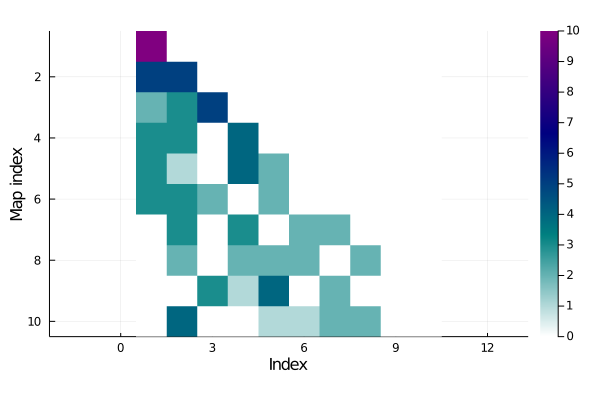

In [16]:
plot(M)

In [17]:
eigen(Symmetric(Hlog))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
10-element Array{Float64,1}:
 -2.083403847950782
  0.276443701411635
  0.8621452269418421
  0.967652093659713
  1.5997603781179404
  2.1203603932270445
  3.072448878927265
  5.688362995901459
  7.596891226717153
  8.601089674114668
vectors:
10×10 Array{Float64,2}:
  0.0102164   -0.00600441  -0.0126802  …   0.957986    -0.283795
  0.0144055   -0.0579848   -0.138064       0.279672     0.939137
 -0.00284989   0.0111805    0.0278488      0.0139081    0.126523
 -0.994231    -0.0319299    0.0180048      0.0139733    0.0105343
 -0.0651483   -0.00459648   0.0363858     -0.00781299  -0.0137492
  0.00625284  -0.168649    -0.256316   …  -0.0348576   -0.00317302
  0.0359      -0.906971    -0.261063      -0.0319275   -0.0971034
 -0.0613491   -0.0277345   -0.318901      -0.0120029   -0.0367577
 -0.0424557   -0.0776844   -0.193516       5.04822e-6   0.00299465
  0.00674389  -0.370937     0.839855       0.0348977    0.101855

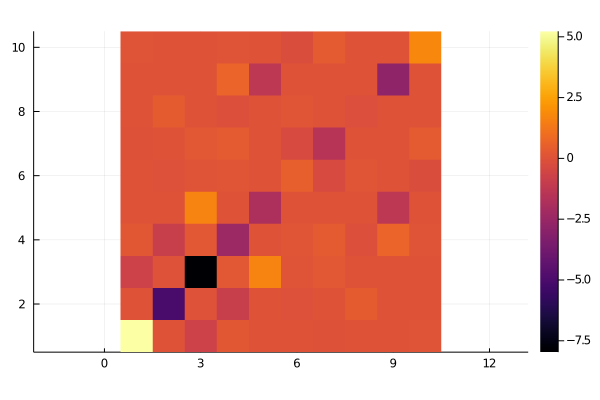

In [24]:
heatmap(Hlog, ratio = 1)

### Hessian of the log pdf

In [357]:
Nx = 100
Ne = 200
m = 10

X = randn(Nx, Ne) .* randn(Nx, Ne) .+ randn(Nx)

C = MapComponent(m, Nx);

In [358]:
M = HermiteMap(m, X);

In [359]:
@time optimize(M, X, 10; withqr = true);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:19


 19.978807 seconds (50.32 M allocations: 12.903 GiB, 7.01% gc time)


In [360]:
@time H = hess_x_log_pdf(M, X)

  1.064366 seconds (1.79 M allocations: 3.407 GiB, 14.33% gc time)


200×100×100 Array{Float64,3}:
[:, :, 1] =
  0.215787    0.00495716  -0.101696    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -2.49355    -0.0299263    0.0116754      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -5.52714     0.0268976   -0.040049       0.0  0.0  0.0  0.0  0.0  0.0  0.0
  1.22469    -0.0381794   -0.00971182     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -7.6841     -0.010912    -0.0786735      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -4.65866     0.00135639  -0.0369118   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -5.52127     0.00855719  -0.0218021      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.0237318  -0.0297779   -0.11056        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.59868     0.0433221    0.102707       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -6.74966     0.00598273   0.029973       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -7.54739     0.0150557   -0.00201314  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  1.76233    -0.0148024   -0.0238691      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -3.53625     0.0143715    0.00864638     0.0 

In [361]:
H[2,:,:]

100×100 Array{Float64,2}:
 -2.49355      -0.0299263    0.0116754   …   0.0        0.0  0.0  0.0  0.0
 -0.0299263     0.745137    -0.282061        0.0        0.0  0.0  0.0  0.0
  0.0116754    -0.282061    -4.75911         0.0        0.0  0.0  0.0  0.0
  0.037208     -0.0303738    0.034891        0.0108645  0.0  0.0  0.0  0.0
  0.0459142     0.0325598    0.0309622       0.0        0.0  0.0  0.0  0.0
 -0.0347148    -0.0911339   -0.021742    …   0.0        0.0  0.0  0.0  0.0
 -0.0118074     0.0          0.0539588       0.0        0.0  0.0  0.0  0.0
 -0.0698501     0.00604175   0.0657492       0.0        0.0  0.0  0.0  0.0
 -0.0463721     0.123978     0.00235971      0.0        0.0  0.0  0.0  0.0
  0.397956      0.0869631   -0.0289297       0.0        0.0  0.0  0.0  0.0
  0.000125878  -0.0774628    3.32567e-5  …   0.0        0.0  0.0  0.0  0.0
  0.00205039    0.0771755   -0.00301861     -0.0326551  0.0  0.0  0.0  0.0
  0.0           0.0710764    0.175273        0.0        0.0  0.0  0.0  0.0

In [364]:
@time Hr = reduced_hess_x_log_pdf(M, X)

 38.110774 seconds (351.23 M allocations: 19.850 GiB, 6.88% gc time)


(
  [1 ,  1]  =  0.215787
  [2 ,  1]  =  0.00495716
  [3 ,  1]  =  -0.101696
  [4 ,  1]  =  -0.00205035
  [5 ,  1]  =  0.0440625
  [6 ,  1]  =  0.000156015
  [7 ,  1]  =  0.000941296
  [8 ,  1]  =  0.00502281
  [9 ,  1]  =  0.102501
  [10,  1]  =  0.0738804
  [11,  1]  =  0.0260493
  [12,  1]  =  0.0230554
  ⋮
  [29, 95]  =  0.00218249
  [37, 95]  =  -0.0600553
  [44, 95]  =  0.0108941
  [87, 95]  =  0.0133049
  [95, 95]  =  -0.133303
  [4 , 96]  =  0.0221027
  [12, 96]  =  0.0273098
  [16, 96]  =  -0.0149455
  [33, 96]  =  -0.00571338
  [36, 96]  =  0.0110138
  [67, 96]  =  0.0203253
  [85, 96]  =  -0.0303887
  [96, 96]  =  0.0405453, 
  [1 ,  1]  =  -2.49355
  [2 ,  1]  =  -0.0299263
  [3 ,  1]  =  0.0116754
  [4 ,  1]  =  0.037208
  [5 ,  1]  =  0.0459142
  [6 ,  1]  =  -0.0347148
  [7 ,  1]  =  -0.0118074
  [8 ,  1]  =  -0.0698501
  [9 ,  1]  =  -0.0463721
  [10,  1]  =  0.397956
  [11,  1]  =  0.000125878
  [12,  1]  =  0.00205039
  ⋮
  [29, 95]  =  -0.0304328
  [37, 95]  =  0.038

In [363]:
Hr[2]

100×100 SparseMatrixCSC{Float64,Int64} with 2464 stored entries:
  [1 ,  1]  =  -2.49355
  [2 ,  1]  =  -0.0299263
  [3 ,  1]  =  0.0116754
  [4 ,  1]  =  0.037208
  [5 ,  1]  =  0.0459142
  [6 ,  1]  =  -0.0347148
  [7 ,  1]  =  -0.0118074
  [8 ,  1]  =  -0.0698501
  [9 ,  1]  =  -0.0463721
  [10,  1]  =  0.397956
  [11,  1]  =  0.000125878
  [12,  1]  =  0.00205039
  ⋮
  [29, 95]  =  -0.0304328
  [37, 95]  =  0.038807
  [44, 95]  =  -0.00825991
  [87, 95]  =  0.00171556
  [95, 95]  =  0.172208
  [4 , 96]  =  0.0108645
  [12, 96]  =  -0.0326551
  [16, 96]  =  0.0168714
  [33, 96]  =  -0.0242025
  [36, 96]  =  -0.0252942
  [67, 96]  =  -0.0137296
  [85, 96]  =  -0.00633981
  [96, 96]  =  -0.148581

In [346]:
@time Hr = reduced_hess_x_log_pdf!(M, X[:,1:2])

  0.433117 seconds (3.81 M allocations: 218.380 MiB, 8.08% gc time)


(
  [1 ,  1]  =  -3.97684
  [2 ,  1]  =  -0.125325
  [3 ,  1]  =  0.616967
  [4 ,  1]  =  -0.0850574
  [5 ,  1]  =  -0.0972608
  [6 ,  1]  =  -0.117239
  [7 ,  1]  =  -0.114327
  [8 ,  1]  =  0.0611112
  [9 ,  1]  =  -0.0797695
  [10,  1]  =  0.153955
  [11,  1]  =  -0.0709846
  [12,  1]  =  -0.00349808
  ⋮
  [22, 94]  =  0.0764631
  [36, 94]  =  0.034934
  [45, 94]  =  0.0286486
  [70, 94]  =  -0.00151792
  [94, 94]  =  -0.187645
  [30, 97]  =  -0.00670117
  [34, 97]  =  -0.0413096
  [45, 97]  =  -0.0112656
  [59, 97]  =  -0.041158
  [60, 97]  =  -0.0158438
  [62, 97]  =  -0.00370727
  [69, 97]  =  -0.00139905
  [97, 97]  =  0.19679, 
  [1 ,  1]  =  -0.963164
  [2 ,  1]  =  -0.34671
  [3 ,  1]  =  0.0924638
  [4 ,  1]  =  0.107496
  [5 ,  1]  =  0.223623
  [6 ,  1]  =  0.333443
  [7 ,  1]  =  1.0851
  [8 ,  1]  =  -1.18365
  [9 ,  1]  =  0.109216
  [10,  1]  =  -0.215815
  [11,  1]  =  -0.108866
  [12,  1]  =  -0.197347
  ⋮
  [22, 94]  =  0.00588958
  [36, 94]  =  -0.0113002
  [45, 94

In [316]:
@time reduced_hess_x_log_pdf(M, X[:,1:1])

  0.222857 seconds (1.90 M allocations: 109.107 MiB, 10.51% gc time)


(
  [1 ,  1]  =  -3.97684
  [2 ,  1]  =  -0.125325
  [3 ,  1]  =  0.616967
  [4 ,  1]  =  -0.0850574
  [5 ,  1]  =  -0.0972608
  [6 ,  1]  =  -0.117239
  [7 ,  1]  =  -0.114327
  [8 ,  1]  =  0.0611112
  [9 ,  1]  =  -0.0797695
  [10,  1]  =  0.153955
  [11,  1]  =  -0.0709846
  [12,  1]  =  -0.00349808
  ⋮
  [22, 94]  =  0.0764631
  [36, 94]  =  0.034934
  [45, 94]  =  0.0286486
  [70, 94]  =  -0.00151792
  [94, 94]  =  -0.187645
  [30, 97]  =  -0.00670117
  [34, 97]  =  -0.0413096
  [45, 97]  =  -0.0112656
  [59, 97]  =  -0.041158
  [60, 97]  =  -0.0158438
  [62, 97]  =  -0.00370727
  [69, 97]  =  -0.00139905
  [97, 97]  =  0.19679,)

In [266]:
for i=1:Nx
    @show norm(reshape(reduced_hess_x_log_pdf(M.C[i], X[1:i,1:1])[1,:,:], (length(active_dim(M.C[i]))^2, )) - sparse(hess_x_log_pdf(M.C[i], X[1:i,1:1])[1,:,:]).nzval)
end

norm(reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :], (length(active_dim(M.C[i])) ^ 2,)) - (sparse((hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :])).nzval) = 4.440892098500626e-16
norm(reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :], (length(active_dim(M.C[i])) ^ 2,)) - (sparse((hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :])).nzval) = 0.0
norm(reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :], (length(active_dim(M.C[i])) ^ 2,)) - (sparse((hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :])).nzval) = 0.0
norm(reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :], (length(active_dim(M.C[i])) ^ 2,)) - (sparse((hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :])).nzval) = 0.0
norm(reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :], (length(active_dim(M.C[i])) ^ 2,)) - (sparse((hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :])).nzval) = 0.0
norm(reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :], (length(active_dim(M.C[i])) ^ 2,)

In [152]:
active_dim(M.C[3])

3-element Array{Int64,1}:
 1
 2
 3

In [153]:
getidx(M.C[3])

10×3 Array{Int64,2}:
 1  0  0
 0  0  1
 0  0  2
 0  0  3
 0  0  4
 0  1  0
 0  2  0
 0  3  0
 0  0  5
 0  0  6

In [258]:
  Nx = 4
  Ne = 100
  X = randn(Nx, Ne)
  X = zeros(X)
  m = 10
  B = MultiBasis(CstProHermite(3), Nx)

  idx = [0 0 0 0; 0 2 0 1; 0 2 3 0; 2 0 2 1; 0 0 1 2; 1 2 0 2;3 2 2 2]

  coeff =  randn(size(idx,1))

  C = MapComponent(m, Nx, idx, coeff)

  dxlogC = grad_x_log_pdf(C, X)
  d2xlogC = hess_x_log_pdf(C, X)


  function evaluatef0(x)
    y = copy(x)
    y[end] = 0.0
    return C.I.f.f(y)
  end

  integrand(t,x) = C.I.g(ForwardDiff.gradient(y->C.I.f.f(y), vcat(x[1:end-1],t*x[end]))[end])

  function Ct(x)
      lb = 0.0
      ub = 1.0
      prob = QuadratureProblem(integrand,lb,ub,x)
      out = evaluatef0(x) + x[end]*solve(prob,CubatureJLh(),reltol=1e-6,abstol=1e-6)[1]
      return out
  end

  log_pdfCt(x) = log_pdf(Ct(x)) + log(C.I.g(ForwardDiff.gradient(z->C.I.f.f(z),x)[end]))

  @inbounds for i=1:Ne
    @test norm(ForwardDiff.gradient(log_pdfCt, member(ens,i)) - dxlogC[i,:])<1e-8
  end

  @inbounds for i=1:Ne
    @test norm(FiniteDiff.finite_difference_hessian(log_pdfCt, member(ens,i)) - d2xlogC[i,:,:])<1e-6
  end

In [259]:
reduced_hess_x_log_pdf(C, ens.S)[1,:,:]

4×4 Array{Float64,2}:
  0.0655131   0.0165223  -0.193495  -0.0262653
  0.0165223  -0.645995    0.226694   0.528719
 -0.193495    0.226694   -0.726425  -0.833576
 -0.0262653   0.528719   -0.833576  -1.11851

In [260]:
FiniteDiff.finite_difference_hessian(log_pdfCt, member(ens,1))

4×4 Symmetric{Float64,Array{Float64,2}}:
  0.0655131   0.0165223  -0.193495  -0.0262653
  0.0165223  -0.645995    0.226694   0.528719
 -0.193495    0.226694   -0.726425  -0.833576
 -0.0262653   0.528719   -0.833576  -1.11851

In [267]:
sparse(hess_x_log_pdf(M.C[5], X[1:5,1:1])[1,:,:])

5×5 SparseMatrixCSC{Float64,Int64} with 16 stored entries:
  [1, 1]  =  0.849703
  [2, 1]  =  0.134958
  [4, 1]  =  0.240928
  [5, 1]  =  0.416254
  [1, 2]  =  0.134958
  [2, 2]  =  -0.384741
  [4, 2]  =  -0.103799
  [5, 2]  =  -0.179335
  [1, 4]  =  0.240928
  [2, 4]  =  -0.103799
  [4, 4]  =  -0.837619
  [5, 4]  =  -0.320151
  [1, 5]  =  0.416254
  [2, 5]  =  -0.179335
  [4, 5]  =  -0.320151
  [5, 5]  =  0.876979

In [268]:
reduced_hess_x_log_pdf(M.C[5], X[1:5,1:1])[1,:,:]

4×4 Array{Float64,2}:
 0.849703   0.134958   0.240928   0.416254
 0.134958  -0.384741  -0.103799  -0.179335
 0.240928  -0.103799  -0.837619  -0.320151
 0.416254  -0.179335  -0.320151   0.876979

In [269]:
reduced_hess_x(M.C[3].I, X[1:3,1:1])[1,:,:]

3×3 Array{Float64,2}:
 -0.0329528  0.0        0.0
  0.0        0.0922217  0.0
  0.0        0.0        0.144356

In [245]:
hess_x(M.C[3].I, X[1:3,1:1])[1,:,:]

3×3 Array{Float64,2}:
 -0.137909  0.0   0.0
  0.0       0.0   0.0
  0.0       0.0  -0.153775

In [246]:
grad_x(M.C[3].I, X[1:3,1:1])[1,:]

3-element Array{Float64,1}:
 -0.10432760447246194
  0.0
  0.593027865699721

In [247]:
reduced_grad_x(M.C[3].I, X[1:3,1:1])[1,:]

2-element Array{Float64,1}:
 -0.10432760447246194
  0.593027865699721

In [248]:
grad_x_grad_xd(M.C[3].I.f.f, X[1:3,1:1])[1,:]

3-element Array{Float64,1}:
  0.0
  0.0
 -0.456236592888174

In [249]:
reduced_grad_x_grad_xd(M.C[3].I.f.f, X[1:3,1:1])[1,:]

2-element Array{Float64,1}:
  0.0
 -0.456236592888174

In [40]:
dim50 = active_dim(M.C[50])

8-element Array{Int64,1}:
  2
 13
 16
 35
 37
 41
 42
 45

In [48]:
@time A = spzeros(Nx, Nx)

  0.000006 seconds (4 allocations: 704 bytes)


50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries

In [70]:
@time S = ntuple(x->spzeros(Nx, Nx), Ne) 

  0.066692 seconds (135.85 k allocations: 7.150 MiB)


(50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries, 50×50 SparseMatrixCSC{Float64,Int64} wi

In [74]:
S[1][active_dim(M.C[Nx]), active_dim(M.C[Nx])]

8×8 SparseMatrixCSC{Float64,Int64} with 0 stored entries

In [64]:
@time zeros(Ne, Nx, Nx)

  0.001065 seconds (2 allocations: 3.815 MiB)


200×50×50 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [50]:
@time A[dim50, dim50] .= reduced_hess_x_log_pdf(M.C[50], X[1:50,1:1])[1,:,:]

  0.003788 seconds (31.29 k allocations: 1.718 MiB)


8×8 view(::SparseMatrixCSC{Float64,Int64}, [2, 13, 16, 35, 37, 41, 42, 45], [2, 13, 16, 35, 37, 41, 42, 45]) with eltype Float64:
 -0.10177    -0.0919206  -0.0154034   …  -0.0421191   -0.042529
 -0.0919206  -0.0833393  -0.0138795      -0.037952    -0.0383213
 -0.0154034  -0.0138795  -0.0047776      -0.00635973  -0.00642162
 -0.025376   -0.0228653  -0.00383162     -0.0104772   -0.0105791
  0.0466544   0.0420385   0.00704453      0.0192625    0.01945
 -0.0309238  -0.0278643  -0.00466931  …  -0.0127677   -0.012892
 -0.0421191  -0.037952   -0.00635973     -0.0161347   -0.0175593
 -0.042529   -0.0383213  -0.00642162     -0.0175593   -0.0165479

In [58]:
ntuple(x->1.0, 5)

(1.0, 1.0, 1.0, 1.0, 1.0)

In [39]:
@inbounds for i=1:Nx
    dimi = active_dim(M.C[i])
    @show norm(sparse(hess_x_log_pdf(M.C[i], X[1:i,1:1])[1,:,:]).nzval- reshape(reduced_hess_x_log_pdf(M.C[i], X[1:i,1:1])[1,:,:], (length(dimi)^2,)))
end

norm((sparse((hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :])).nzval - reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :], (length(dimi) ^ 2,))) = 0.0
norm((sparse((hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :])).nzval - reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :], (length(dimi) ^ 2,))) = 0.006061559125395311
norm((sparse((hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :])).nzval - reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :], (length(dimi) ^ 2,))) = 0.03388905777826503
norm((sparse((hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :])).nzval - reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :], (length(dimi) ^ 2,))) = 0.020760704942788744
norm((sparse((hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :])).nzval - reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :], (length(dimi) ^ 2,))) = 0.021437975350422828
norm((sparse((hess_x_log_pdf(M.C[i], X[1:i, 1:1]))[1, :, :])).nzval - reshape((reduced_hess_x_log_pdf(M.C[i], X[1:i, 1:1]))

In [17]:
active_dim(M.C[4])

2-element Array{Int64,1}:
 1
 3

In [ ]:
@time reduced_hess_x_log_pdf(M.C[5], X[1:5,:])

In [110]:
@time C, _ = optimize(C, X, 5; withqr = true)

  0.106911 seconds (634.21 k allocations: 116.700 MiB)


(MapComponent(10, 5, 80, IntegratedFunction(10, 5, 80, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 5, 80, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 80), [0 0 … 0 1; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], [30, 47, 55, 80], [-2.171520165870859, 1.7091711312428808, -1.6635084893785494, 1.319779407855924, -0.44415472587303934]))), 1.0e-6), [1.7602143490700157, 1.423346863056135, 1.402840147526665, 1.3711412452008895, 1.3483119349078765, 1.3412732786803783])

In [33]:
@time for i=1:Ne
    hess_x_log_pdf(C, X[:,i:i])
end

  0.126218 seconds (1.06 M allocations: 86.695 MiB, 8.66% gc time)


In [93]:
Nx = 4
Ne = 100
X = zeros(Nx, Ne)

ens.S .= randn(Nx, Ne)

# ens.S .=  [0.267333   1.43021;
#           0.364979   0.607224;
#          -1.23693    0.249277;
#          -2.0526     0.915629;
#          -0.182465   0.415874;
#           0.412907   1.01672;
#           1.41332   -0.918205;
#           0.766647  -1.00445]';
B = MultiBasis(CstProHermite(10), Nx)

# idx = [0 0; 0 1; 1 0; 1 1; 1 2]
idx = [0 0 0 1; 0 2 1 0; 0 2 3 0; 0 0 2 0; 0 0 1 1; 0 2 2 0;0 2 2 0]

truncidx = idx[1:2:end,:]
Nψ = 7

coeff = randn(Nψ)

# coeff =   [0.6285037650645056;
#  -0.4744029092496623;
#   1.1405280011620331;
#  -0.7217760771894809;
#   0.11855056306742319]
f = ExpandedFunction(B, idx, coeff)

ExpandedFunction(12, 7, 4, MultiBasis(Basis of 12 functions: Constant -> 10th degree Probabilistic Hermite function
, 4), [0 0 0 1; 0 2 1 0; … ; 0 2 2 0; 0 2 2 0], [2, 3, 4], [-1.441367843561733, -1.2716263652525461, -0.3544452741747084, -0.6167664877542416, -0.4419668295003302, -0.4132573295760653, 0.22042484145623792])

In [94]:
grad_x_grad_xd(f, ens.S)

100×4 SparseMatrixCSC{Float64,Int64} with 200 stored entries:
  [1  , 3]  =  0.0025916
  [2  , 3]  =  0.00521713
  [3  , 3]  =  -0.00395105
  [4  , 3]  =  -0.00268005
  [5  , 3]  =  -0.0061371
  [6  , 3]  =  0.0178652
  [7  , 3]  =  0.00180306
  [8  , 3]  =  0.0172228
  [9  , 3]  =  0.0010536
  [10 , 3]  =  -0.0107695
  [11 , 3]  =  0.0183692
  [12 , 3]  =  0.0022463
  ⋮
  [88 , 4]  =  0.488187
  [89 , 4]  =  -0.211215
  [90 , 4]  =  0.43463
  [91 , 4]  =  -0.103418
  [92 , 4]  =  0.495978
  [93 , 4]  =  0.0687632
  [94 , 4]  =  0.53114
  [95 , 4]  =  0.532747
  [96 , 4]  =  -0.21782
  [97 , 4]  =  0.312138
  [98 , 4]  =  0.504909
  [99 , 4]  =  0.163494
  [100, 4]  =  -0.085937

In [105]:
@time hess_x_grad_xd(f, ens.S)

  0.000120 seconds (184 allocations: 112.469 KiB)


100×4×4 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 ⋮              
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 ⋮              
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0 

In [108]:
?maximum

search: maximum maximum!



```
maximum(f, itr)
```

Returns the largest result of calling function `f` on each element of `itr`.

# Examples

```jldoctest
julia> maximum(length, ["Julion", "Julia", "Jule"])
6
```

---

```
maximum(itr)
```

Returns the largest element in a collection.

# Examples

```jldoctest
julia> maximum(-20.5:10)
9.5

julia> maximum([1,2,3])
3
```

---

```
maximum(A::AbstractArray; dims)
```

Compute the maximum value of an array over the given dimensions. See also the [`max(a,b)`](@ref) function to take the maximum of two or more arguments, which can be applied elementwise to arrays via `max.(a,b)`.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Array{Int64,2}:
 1  2
 3  4

julia> maximum(A, dims=1)
1×2 Array{Int64,2}:
 3  4

julia> maximum(A, dims=2)
2×1 Array{Int64,2}:
 2
 4
```

---

```
maximum(d::UnivariateDistribution)
```

Return the maximum of the support of `d`.


In [ ]:
fp = ParametricFunction(f);
R = IntegratedFunction(fp)

# Test grad_x
dψ = grad_x(R, ens.S)

function Gradient(x)
    return ForwardDiff.gradient(y->begin
                           y[end] = 0.0
                           return  R.f.f(y)
        end, x) + quadgk(t->ForwardDiff.gradient(
                  z->R.g(ForwardDiff.gradient(y->R.f.f(y), vcat(z[1:end-1],t))[end]),
            x), 0.0, x[end])[1] + vcat(zeros(size(x,1)-1), R.g(ForwardDiff.gradient(y->R.f.f(y), x)[end]))
end

for i=1:Ne
    xi = member(ens, i)
    dψt = Gradient(xi)
    @test norm(dψ[i,:] - dψt)<1e-8
end

# Test hess_x
H = hess_x(R, ens.S)
Ht = zeros(Nx, Nx)
function Hessian!(H, x)
    fill!(H, 0.0)

    H[1:Nx-1,1:Nx-1] .= ForwardDiff.hessian(y->begin
                        y[Nx] = 0.0
                        return R.f.f(y) end, x)[1:Nx-1,1:Nx-1]

    # Hessian of the integral term
    H[1:Nx-1,1:Nx-1] .+= (quadgk(t -> ForwardDiff.hessian(
    z-> R.g(ForwardDiff.gradient(y->R.f.f(y), vcat(z[1:end-1], t))[end]), x),
            0.0, x[end], rtol = 1e-3)[1])[1:Nx-1,1:Nx-1]

    # H[Nx,:] and H[:,Nx]
    H[:, Nx] .= ForwardDiff.gradient(z->R.g(ForwardDiff.gradient(y->R.f.f(y), z)[end]), x)
    H[Nx, :] .= H[:, Nx]
    return H
end

@inbounds for i=1:Ne
    @test norm(H[i,:,:] - Hessian!(Ht, member(ens,i)))<1e-8
end

In [53]:
@time H = hess_x(R, ens.S)

  0.000865 seconds (4.01 k allocations: 1.891 MiB)


100×4×4 Array{Float64,3}:
[:, :, 1] =
 -0.0964337  -0.0674525    -0.0487513    0.0
  0.170613   -0.295148     -0.0036138    0.0
  0.0973462  -0.1385        0.0715157    0.0
 -0.177879   -0.0565548     0.0831321    0.0
  0.329986   -0.000297408   0.0556336    0.0
 -0.0228539  -0.24175       0.0310046    0.0
  0.0541346  -0.0902857    -0.128441     0.0
  0.0597517  -0.204052      0.105655     0.0
  0.115185   -0.160146     -0.0206921    0.0
 -0.19149    -0.0487099    -0.197842     0.0
  0.0709742  -0.498082      0.0145669    0.0
  0.253816   -0.136111      0.0947919    0.0
 -0.0959332  -0.327614      0.0944209    0.0
  ⋮                                      
  0.106536    0.230424      0.0510377    0.0
 -0.24942     0.197494     -0.0487838    0.0
 -0.173611    0.262431     -0.0261933    0.0
 -0.0380546   0.131339     -0.133002     0.0
 -0.0129427  -0.0304951    -0.13549      0.0
  0.077019   -0.253242     -0.0623202    0.0
 -0.12661     0.234239     -0.0352125    0.0
 -0.485488   -0.0203

In [56]:
reduced_hess_x(R, ens.S)

100×3×3 Array{Float64,3}:
[:, :, 1] =
 -0.0964337  -0.0674525    -0.0487513
  0.170613   -0.295148     -0.0036138
  0.0973462  -0.1385        0.0715157
 -0.177879   -0.0565548     0.0831321
  0.329986   -0.000297408   0.0556336
 -0.0228539  -0.24175       0.0310046
  0.0541346  -0.0902857    -0.128441
  0.0597517  -0.204052      0.105655
  0.115185   -0.160146     -0.0206921
 -0.19149    -0.0487099    -0.197842
  0.0709742  -0.498082      0.0145669
  0.253816   -0.136111      0.0947919
 -0.0959332  -0.327614      0.0944209
  ⋮                        
  0.106536    0.230424      0.0510377
 -0.24942     0.197494     -0.0487838
 -0.173611    0.262431     -0.0261933
 -0.0380546   0.131339     -0.133002
 -0.0129427  -0.0304951    -0.13549
  0.077019   -0.253242     -0.0623202
 -0.12661     0.234239     -0.0352125
 -0.485488   -0.0203409    -0.000987337
  0.140078   -0.144592     -0.0432851
  0.425849    0.0103578     0.187824
  0.0170214  -0.0534207    -0.0957844
  0.0188666   0.0152579    

In [49]:
H[1,:,:]

4×4 Array{Float64,2}:
 -0.0964337  -0.0674525  -0.0487513  0.0
 -0.0674525  -0.0721803  -0.322323   0.0
 -0.0487513  -0.322323    0.0591162  0.0
  0.0         0.0         0.0        0.0

In [52]:
grad_x_basis(C.I.f.f, X)

200×5×80 Array{Float64,3}:
[:, :, 1] =
 0.0   0.228788   0.0   0.0  0.0
 0.0   0.260492   0.0   0.0  0.0
 0.0   0.270889   0.0  -0.0  0.0
 0.0   0.268132   0.0   0.0  0.0
 0.0   0.270887   0.0   0.0  0.0
 0.0   0.203639   0.0   0.0  0.0
 0.0  -0.189816   0.0   0.0  0.0
 0.0   0.198624   0.0   0.0  0.0
 0.0   0.255637   0.0   0.0  0.0
 0.0   0.268344   0.0   0.0  0.0
 0.0   0.262362   0.0   0.0  0.0
 0.0   0.265127   0.0   0.0  0.0
 0.0   0.244698   0.0   0.0  0.0
 ⋮                           
 0.0   0.256737   0.0   0.0  0.0
 0.0  -0.24544    0.0  -0.0  0.0
 0.0   0.0855302  0.0   0.0  0.0
 0.0   0.0982697  0.0   0.0  0.0
 0.0   0.177458   0.0  -0.0  0.0
 0.0   0.264412   0.0   0.0  0.0
 0.0   0.204021   0.0  -0.0  0.0
 0.0  -0.261254   0.0   0.0  0.0
 0.0   0.247273   0.0   0.0  0.0
 0.0   0.246723   0.0   0.0  0.0
 0.0   0.234866   0.0  -0.0  0.0
 0.0  -0.0755584  0.0   0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.

In [50]:
Hr[1,:,:]

3×3 Array{Float64,2}:
 -0.0964337  -0.0674525  -0.0487513
 -0.0674525  -0.0721803  -0.322323
 -0.0487513  -0.322323    0.0591162

In [58]:
@time Hr = reduced_hess_x(R, ens.S)

  0.001601 seconds (3.97 k allocations: 1.866 MiB)


100×3×3 Array{Float64,3}:
[:, :, 1] =
 -0.0964337  -0.0674525    -0.0487513
  0.170613   -0.295148     -0.0036138
  0.0973462  -0.1385        0.0715157
 -0.177879   -0.0565548     0.0831321
  0.329986   -0.000297408   0.0556336
 -0.0228539  -0.24175       0.0310046
  0.0541346  -0.0902857    -0.128441
  0.0597517  -0.204052      0.105655
  0.115185   -0.160146     -0.0206921
 -0.19149    -0.0487099    -0.197842
  0.0709742  -0.498082      0.0145669
  0.253816   -0.136111      0.0947919
 -0.0959332  -0.327614      0.0944209
  ⋮                        
  0.106536    0.230424      0.0510377
 -0.24942     0.197494     -0.0487838
 -0.173611    0.262431     -0.0261933
 -0.0380546   0.131339     -0.133002
 -0.0129427  -0.0304951    -0.13549
  0.077019   -0.253242     -0.0623202
 -0.12661     0.234239     -0.0352125
 -0.485488   -0.0203409    -0.000987337
  0.140078   -0.144592     -0.0432851
  0.425849    0.0103578     0.187824
  0.0170214  -0.0534207    -0.0957844
  0.0188666   0.0152579    

### Gradient and Hessian of the log pdf

In [3]:
using LinearAlgebra
using SparseArrays 

N = 200
Nx = 20

dim = [1; 2; 5; 8; 10; 14; 17; 20]

@time A  = sparse(repeat(1:N, length(dim)), vcat([i*ones(Int64, N) for i in dim]...), zeros(N*length(dim)), N, Nx)

  0.246227 seconds (851.98 k allocations: 43.563 MiB)


200×20 SparseMatrixCSC{Float64,Int64} with 1600 stored entries:
  [1  ,  1]  =  0.0
  [2  ,  1]  =  0.0
  [3  ,  1]  =  0.0
  [4  ,  1]  =  0.0
  [5  ,  1]  =  0.0
  [6  ,  1]  =  0.0
  [7  ,  1]  =  0.0
  [8  ,  1]  =  0.0
  [9  ,  1]  =  0.0
  [10 ,  1]  =  0.0
  [11 ,  1]  =  0.0
  [12 ,  1]  =  0.0
  ⋮
  [188, 20]  =  0.0
  [189, 20]  =  0.0
  [190, 20]  =  0.0
  [191, 20]  =  0.0
  [192, 20]  =  0.0
  [193, 20]  =  0.0
  [194, 20]  =  0.0
  [195, 20]  =  0.0
  [196, 20]  =  0.0
  [197, 20]  =  0.0
  [198, 20]  =  0.0
  [199, 20]  =  0.0
  [200, 20]  =  0.0

In [69]:
grad_xd(C.I.f.f, X)

200-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [114]:
@time reduced_hess_x_log_pdf(C, X)

  0.002586 seconds (5.35 k allocations: 4.712 MiB)


200×4×4 Array{Float64,3}:
[:, :, 1] =
 -1.21488     0.00334462   0.0464437   -0.100514
  0.118694   -0.00172429   0.025243    -0.0605561
  0.0836194   0.158005    -0.0071078    0.351504
  0.358303    0.0288238   -0.0259118    0.175581
  0.552916    0.0826858   -0.153311     0.221982
  0.10074    -0.00570238   0.00346454  -0.0204749
 -0.0768186  -0.0301899   -0.0412685   -0.0693158
  0.11799     0.0258439   -0.0258592    0.0905699
 -0.37815     0.0546277   -0.214647     0.542897
  0.272475   -0.0391252    0.053218    -0.121033
  0.312335   -0.0271281    0.0417411   -0.0910673
 -0.318629    0.0219676   -0.0335506    0.0770085
  0.58097    -0.0295062    0.0438458   -0.0844441
  ⋮                                    
  0.333395    0.0628617   -0.0476403    0.224577
 -0.376445    0.114535    -0.175698     0.421914
 -0.271946   -0.005685    -0.0184441    0.0567881
 -0.0818643  -0.151512     0.208799    -0.564775
 -0.377102    0.148312    -0.227662     0.551111
 -0.263862   -0.0250742    0.070

In [66]:
grad_x_grad_xd(C.I.f.f, X)

200×80 SparseMatrixCSC{Float64,Int64} with 0 stored entries

In [13]:
using Plots

In [10]:
M = HermiteMap(m, X);
@time optimize(M, X, 10; withqr = true)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.482900 seconds (938.57 k allocations: 301.988 MiB, 9.44% gc time)


HermiteMap(10, 8, LinearTransform(8, [1.4432899320127036e-17, 1.2212453270876723e-16, 3.552713678800501e-17, 3.538835890992686e-17, 8.881784197001253e-18, -4.3021142204224816e-18, -2.997602166487923e-16, -4.773959005888173e-17], [1.0000000000000004 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0000000000000002 0.0; 0.0 0.0 … 0.0 0.9999999999999996], true), MapComponent[MapComponent(10, 10, 1, IntegratedFunction(10, 10, 1, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 10, 1, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 1), [1; 2; … ; 9; 10], [1], [-0.17031642908974737, -2.5109314416189386, -1.22645803876244, -9.054257749530365, -5.682873035961211, -10.742543984439571, -9.726539366451775, -7.821656310631472, -4.907227197804628, -1.8432420820493216]))), 1.0e-6), MapComponent(10, 10, 2, IntegratedFunction(10, 10, 2, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 10, 2, MultiBasis(Basis of 10 functions: Consta

In [6]:
@time grad_x_log_pdf(M, X)

  3.856417 seconds (9.35 M allocations: 863.526 MiB, 3.73% gc time)


200×80 Array{Float64,2}:
 -2.12838   -0.524464    1.97852   …  -0.00866443  -1.8021     0.519367
  1.73324   -1.35326     1.17204       0.144907    -0.429345  -0.577886
 -0.756161   2.05738    -3.4372       -1.49649     -0.227982  -1.23262
 -0.112083   1.07242     0.180696      0.126996    -1.20886   -0.0569585
  1.21815   -1.60656     1.20079      -0.0223136   -1.39148    1.0348
 -1.0865    -1.1931     -0.057196  …  -1.37386      0.243715  -0.458595
 -3.33103    4.72669    -1.5253       -0.0611548   -1.44565   -0.21099
 -2.19226    0.592652    2.0572       -0.909262     3.06111    0.540907
 -0.731292   0.0475403  -0.427324      0.909664     4.67169    1.00814
  6.03866    1.31779    10.2716        0.12455     -1.40938   -0.0517042
 -0.176656   0.165227    2.70689   …   0.0173186   -1.76691    0.254459
  2.73725   -0.0291816  -1.51748       0.10574     -0.743214   0.296024
 -0.553974   1.19469    -3.01912      -0.0474011   -0.517724  -1.55388
  ⋮                                ⋱       

In [7]:
@time hess_x_log_pdf(M, X)

  6.183824 seconds (14.18 M allocations: 3.431 GiB, 4.49% gc time)


200×80×80 Array{Float64,3}:
[:, :, 1] =
  -3.87737   -0.271296    -0.38409     0.297088    …  0.0  0.0  0.0  0.0  0.0
  -5.76628   -0.0758583   -0.296743   -0.0130477      0.0  0.0  0.0  0.0  0.0
   1.50737   -0.439169     0.126694    0.083416       0.0  0.0  0.0  0.0  0.0
   3.01362    0.181364    -0.414761    0.129186       0.0  0.0  0.0  0.0  0.0
  -1.4367    -0.684564    -0.425461   -0.081035       0.0  0.0  0.0  0.0  0.0
  -8.46367   -0.102582    -0.185967   -0.158676    …  0.0  0.0  0.0  0.0  0.0
  -1.76695    0.358212     0.3921      0.0456483      0.0  0.0  0.0  0.0  0.0
  -1.29052   -0.243709    -0.0493311   0.186923       0.0  0.0  0.0  0.0  0.0
  -1.50915   -0.230923    -0.02077     0.183369       0.0  0.0  0.0  0.0  0.0
  -2.73297   -0.635795    -0.441721   -0.116042       0.0  0.0  0.0  0.0  0.0
  -7.3529    -0.0376564   -0.177715   -0.0411809   …  0.0  0.0  0.0  0.0  0.0
  -6.98862   -0.244087    -0.450128   -0.0365791      0.0  0.0  0.0  0.0  0.0
  -8.13747   -0.0491356 

In [8]:
Nx = 8
Ne = 100
m = 10

X = randn(Nx, Ne) .* randn(Nx, Ne) .+ randn(Nx)

idx =  [ 0  0  0  0  0  1  0  1
         0  0  0  0  4  0  0  2
         0  1  2  3  0  0  1  0
         0  0  0  1  0  0  0  0
         0  0  1  0  0  3  0  0]

coeff =  [   0.7826236383247712
              1.6396512186057377
              1.2687650163074022
             -0.8193039185231135
             -0.8190203466485412];

In [182]:
f = ExpandedFunction(MultiBasis(CstProHermite(m-2), Nx), idx, coeff)

ExpandedFunction(10, 5, 8, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 8), [0 0 … 0 1; 0 0 … 0 2; … ; 0 0 … 0 0; 0 0 … 0 0], [2, 3, 4, 5, 6, 7, 8], [0.7826236383247712, 1.6396512186057377, 1.2687650163074022, -0.8193039185231135, -0.8190203466485412])

In [183]:
out = zeros(Ne, Nx);

In [198]:
@time G = grad_x_grad_xd(f, X)

  0.000251 seconds (284 allocations: 189.562 KiB)


100×8 SparseMatrixCSC{Float64,Int64} with 300 stored entries:
  [1  , 5]  =  -0.324907
  [2  , 5]  =  -0.250077
  [3  , 5]  =  -0.106659
  [4  , 5]  =  0.661336
  [5  , 5]  =  -0.717391
  [6  , 5]  =  0.565755
  [7  , 5]  =  -0.576917
  [8  , 5]  =  0.150128
  [9  , 5]  =  0.166284
  [10 , 5]  =  -0.0557951
  [11 , 5]  =  -0.146452
  [12 , 5]  =  0.661153
  ⋮
  [88 , 8]  =  -0.0225185
  [89 , 8]  =  -0.277108
  [90 , 8]  =  -0.248234
  [91 , 8]  =  -0.290485
  [92 , 8]  =  0.148164
  [93 , 8]  =  0.0223947
  [94 , 8]  =  -0.104531
  [95 , 8]  =  -0.00790913
  [96 , 8]  =  -0.538556
  [97 , 8]  =  0.328602
  [98 , 8]  =  -0.280009
  [99 , 8]  =  -0.136048
  [100, 8]  =  -0.0944275

In [201]:
@time hess_x_grad_xd(f, X)

  0.000245 seconds (610 allocations: 335.297 KiB)


100×8×8 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮         
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0 

In [193]:
any([line[5]*line[end] for line in eachslice(f.idx; dims = 1)] .> 0)

true

In [123]:
@time G = grad_x_grad_xd(f, X)

  0.000156 seconds (489 allocations: 398.922 KiB)


100×8 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0127413   -0.0241814    0.0   0.374469
 0.0  0.0  0.0  0.0   0.0332488    0.0300141    0.0   0.249963
 0.0  0.0  0.0  0.0  -0.293196     0.0183344    0.0   0.0893351
 0.0  0.0  0.0  0.0   0.41516      0.014481     0.0   0.0138916
 0.0  0.0  0.0  0.0   0.0869764    0.0381148    0.0  -0.238521
 0.0  0.0  0.0  0.0   0.37052     -0.00505007   0.0  -0.289426
 0.0  0.0  0.0  0.0  -0.00974022  -0.000454808  0.0  -0.446744
 0.0  0.0  0.0  0.0  -0.276455     0.0358006    0.0  -0.0204303
 0.0  0.0  0.0  0.0  -0.390595    -0.0126135    0.0   0.0564649
 0.0  0.0  0.0  0.0   0.644444     0.0258624    0.0  -0.0576162
 0.0  0.0  0.0  0.0   0.412609    -0.00967158   0.0  -0.0219708
 0.0  0.0  0.0  0.0   0.342315    -0.0344039    0.0  -0.293708
 0.0  0.0  0.0  0.0   0.52078     -0.00590333   0.0  -0.210495
 ⋮                                 ⋮                 
 0.0  0.0  0.0  0.0  -0.00892087  -0.00856236   0.0  -0.415115
 0.0  0.0  0.0  0.0  -0.17462     

In [210]:
hess_x_grad_xd(f, X)

100×8×8 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮         
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0 

In [105]:
M = HermiteMap(m, X);

In [85]:
optimize(M, X, "split"; withqr = true)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


HermiteMap(10, 8, LinearTransform(8, [-1.9674312600758872, 0.2327841513578278, -1.056506919792538, 0.5373681212681528, 0.9954007469453348, -0.22056228207191797, 0.11958535999553176, 0.6997747039281298], [0.9639076054277232 0.0 … 0.0 0.0; 0.0 1.067813688131628 … 0.0 0.0; … ; 0.0 0.0 … 1.0123667265164973 0.0; 0.0 0.0 … 0.0 0.9608462598687618], true), MapComponent[MapComponent(10, 10, 1, IntegratedFunction(10, 10, 1, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 10, 1, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 1), [1; 2; … ; 9; 10], [1], [0.34955305654557955, -3.2846964501846427, -3.5219927969936062, -16.685169764972073, -14.000989840631245, -27.526511922813725, -16.34532814115463, -21.414112149110924, -6.7848431662328705, -5.260983918363335]))), 1.0e-6), MapComponent(10, 10, 2, IntegratedFunction(10, 10, 2, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 10, 2, MultiBasis(Basis of 10 functions: Constant -> 8t

In [202]:
@time log_pdf(M, X)

  0.000246 seconds (1.37 k allocations: 755.000 KiB)


100-element Array{Float64,1}:
 -14.07529101487674
 -13.227716081922795
 -14.753254346537872
 -13.827666064482496
 -13.602628249466743
 -11.285889477422302
 -13.817212908998192
 -17.861659624882527
 -18.04580176868005
 -16.569610262512562
 -18.247681865569884
 -28.189131567722505
 -20.11240491521368
   ⋮
 -12.71949498868644
 -11.700552440293054
 -18.603022019721045
 -17.66405147110061
 -35.63983029830263
 -15.724078198218635
 -12.98819803500822
 -16.647001129988205
 -11.17284107036538
 -11.783775484929327
 -14.040750447206332
 -11.460018030628616

In [204]:
@time grad_x_log_pdf(M, X)

  0.001286 seconds (2.40 k allocations: 1.288 MiB)


100×8 Array{Float64,2}:
   0.335195    -3.14634    -2.34136    …  -2.2702     0.475952   -0.384433
   7.01493      2.40842     0.0880603      0.327978   0.175131   -0.857232
  -1.51296     -2.45646    -1.94238       -2.51906    0.812536   -0.0378477
  -0.0154932   -1.35254    -1.45672       -1.04537    0.262274    0.0416189
  -0.247785     0.824156   -0.617895      -1.28723   -0.46456     0.114864
  -0.270503     2.08767     0.039155   …   0.618888   0.14713    -0.60055
  -1.10407      1.29617    -0.505211      -0.936528  -0.345288    0.0373031
   1.21296     -2.11934    -1.88608        1.12489   -1.70083    -1.72249
 -18.7509      10.5713      2.86904        3.13575    0.657125    0.635462
  -0.363586    -1.74644    -1.66517       -2.3989    -0.105092   -0.17184
   6.43729      2.37757    -0.0180432  …  -0.856843   0.21129    -0.716788
  25.7591      14.6558      1.66497       -0.199616  -1.59785    -0.0758588
 -11.5397     -19.1854     -9.49858        4.87034    0.53452     1.13492
 

In [22]:
@time hess_x_log_pdf(M, X)

  0.016325 seconds (38.80 k allocations: 44.094 MiB)


100×8×8 Array{Float64,3}:
[:, :, 1] =
  -8.6731    -0.116978     0.388357   -0.543524     0.791263  0.0  0.0  0.0
 -10.9934     0.122617    -0.120598   -0.0317758    0.649227  0.0  0.0  0.0
   5.90597   -0.449718     0.66763    -0.330059    -0.115265  0.0  0.0  0.0
  -4.76381    0.32024      0.445829   -0.705058     0.440838  0.0  0.0  0.0
  -1.27063    0.126023     0.863296   -0.650393     0.422291  0.0  0.0  0.0
  -0.942428  -0.548003    -0.617943    0.630133     0.31061   0.0  0.0  0.0
  -5.65384    0.105433     0.0743771  -0.0823079    0.256242  0.0  0.0  0.0
   0.18693    0.519968     0.0742497  -0.884167     0.330545  0.0  0.0  0.0
   3.80461    0.0281726    0.940967   -0.347748     0.444506  0.0  0.0  0.0
  -7.30805    0.0809263    0.196427   -0.00774074   0.284559  0.0  0.0  0.0
  -3.57267   -0.2508       0.0802132   0.439328     0.552726  0.0  0.0  0.0
  -8.80272    0.218215     0.240688   -0.442409     0.794594  0.0  0.0  0.0
  -6.45108    0.00177636  -0.0284179   0.195026   

In [ ]:
@time hess_x_log_pdf(M, reshape(X[:,1],(Nx,1)))

In [16]:
@time hess_x_log_pdf(M, reshape(X[:,1],(Nx,1)))

  0.004294 seconds (26.03 k allocations: 1.736 MiB)


1×8×8 Array{Float64,3}:
[:, :, 1] =
 -8.6731  -0.116978  0.388357  -0.543524  0.791263  0.0  0.0  0.0

[:, :, 2] =
 -0.116978  3.44996  0.414521  0.0  0.0  0.0  0.0  0.0

[:, :, 3] =
 0.388357  0.414521  1.52155  0.827067  …  0.44165  -0.109375  0.604273

[:, :, 4] =
 -0.543524  0.0  0.827067  -3.92358  0.0  0.00937527  -0.040473  0.0

[:, :, 5] =
 0.791263  0.0  -0.0187205  0.0  -3.35089  0.0  0.0  0.0

[:, :, 6] =
 0.0  0.0  0.44165  0.00937527  0.0  -7.53913  0.109941  -0.324768

[:, :, 7] =
 0.0  0.0  -0.109375  -0.040473  0.0  0.109941  0.860028  0.0

[:, :, 8] =
 0.0  0.0  0.604273  0.0  0.0  -0.324768  0.0  -2.96995

In [92]:
@time hess_x_log_pdf(M, X)

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
  0.071069 seconds (53.75 k allocations: 56.641 MiB, 71.13% gc time)


100×8×8 Array{Float64,3}:
[:, :, 1] =
 -18.4656   -0.81759      0.10205     -0.272793     0.171482    0.0  0.0  0.0
 -11.7156   -1.04933     -0.0971424   -0.413418     0.330582    0.0  0.0  0.0
  -7.4154   -0.531115     0.458902    -0.116        0.358292    0.0  0.0  0.0
 -42.4767    0.0667853   -0.136815    -0.00978247   0.00395374  0.0  0.0  0.0
 -13.4094   -0.373711     0.308848    -0.282821     0.396802    0.0  0.0  0.0
  33.3538   -0.664982    -0.0776533   -0.128807     0.0687822   0.0  0.0  0.0
   1.14581  -0.0325043    0.670688    -0.353422     0.436421    0.0  0.0  0.0
 -11.4767   -1.68242      0.317704    -0.274421     0.184386    0.0  0.0  0.0
 -32.7548   -1.69298      0.24987     -0.273717     0.195736    0.0  0.0  0.0
 -13.5845    0.00330506   0.29882     -0.155705     0.398682    0.0  0.0  0.0
 -12.4151   -1.22528      0.207999    -0.188692     0.262144    0.0  0.0  0.0
 -17.0997   -1.38335      0.421952    -0.339898     0.355052    0.0  0.0  0.0
 237.255     0.00962815  -

In [4]:
C = MapComponent(m, Nx, idx, coeff)
R = C.I;

In [42]:
A = spzeros(200, 50)

200×50 SparseMatrixCSC{Float64,Int64} with 0 stored entries

In [48]:
@time A[:, C.I.f.f.dim] .= 1.0

  0.000093 seconds (13 allocations: 1024 bytes)


200×7 view(::SparseMatrixCSC{Float64,Int64}, :, [2, 3, 4, 5, 6, 7, 8]) with eltype Float64:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 ⋮                        ⋮    
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [67]:
@time hess_x_log_pdf(C, X)

  0.035233 seconds (20.72 k allocations: 11.458 MiB, 75.65% gc time)


100×8×8 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮         
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0 

In [68]:
active_dim(C)

7-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8

In [69]:
Nx = 20
Ne = 100
m = 10

X = randn(Nx, Ne) .* randn(Nx, Ne) .+ randn(Nx)

20×100 Array{Float64,2}:
  4.44212     1.55133     1.23704   …   1.17904    1.47349       1.22132
  0.739209    0.907446    0.760047      0.734759  -0.772375      0.729928
 -0.329294   -0.448884    0.15123      -0.344865  -0.000751822  -1.30132
 -2.8341     -3.88839    -3.40181      -2.73725   -2.85125      -4.07254
 -0.131592    0.0486602  -0.405223     -0.199287  -0.434478     -0.416795
 -0.0834038  -0.731346   -0.674303  …  -1.51905   -0.295569     -0.713603
 -1.32822    -2.0281     -1.39729      -0.946584  -1.30075      -1.36029
  0.990355    0.786539    1.0838        0.828869   0.775315      1.47418
  0.252482    0.954336    0.748518      1.31832    1.12458       1.8777
  0.818792    1.17088     1.15804       0.928906  -0.218319      1.38358
  0.996127    0.834946    0.250157  …   1.60067    0.689932      1.09236
  1.2597      2.02082     1.57994       1.4104     2.96938       0.811123
  0.319083   -0.0511914  -1.69619       1.46726   -0.0573451     0.158157
 -0.368772   -0.816835

In [70]:
C = MapComponent(m, Nx)
C, _ = optimize(C, X, 20; withqr = true)

(MapComponent(10, 20, 20, IntegratedFunction(10, 20, 20, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 20, 20, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 20), [0 0 … 0 1; 0 0 … 0 2; … ; 0 0 … 0 0; 0 0 … 1 0], [1, 2, 6, 7, 9, 11, 16, 19, 20], [0.04455939704936274, -0.033094891190816766, -1.305849826827766, 2.779548175526521, -1.1940587179019155, -1.0289288880643006, 3.1435758529138154, 0.5479060006324016, -2.6141527294114764, 2.3204152921593932, -1.4915686841730058, -0.6848030806700021, -0.34235196653356914, 1.1085952337423697, -0.6043442546452251, -0.9824904265708378, 1.0574025609203483, 1.532808247909645, 0.345548759816465, -0.6659750575194693]))), 1.0e-6), [1.906014985569189, 1.2352444285027309, 1.1938185779917287, 1.1720282969521132, 1.1340905919655688, 1.1051666496474686, 1.0965196528761771, 1.0865642517030867, 1.0741848974963746, 1.0662286799126075  …  1.0245488002034406, 1.0173229801498398, 1.0146562065442164, 1.0069

In [78]:
@time hess_x_log_pdf(C, X)

  0.023899 seconds (37.48 k allocations: 57.808 MiB)


100×20×20 Array{Float64,3}:
[:, :, 1] =
 -3.41108e-5   0.00486404   0.0  0.0  …  0.0  0.0  -0.00182255   -0.0189291
 -0.0708718    0.121903     0.0  0.0     0.0  0.0   0.0497704    -0.513777
 -0.125303     0.127571     0.0  0.0     0.0  0.0  -0.049381     -0.280412
  0.0461737    0.0418033    0.0  0.0     0.0  0.0  -0.044876     -0.552708
 -0.0421857    0.132991     0.0  0.0     0.0  0.0  -0.0337807    -0.426192
 -0.206927     0.0414349    0.0  0.0  …  0.0  0.0  -0.0444077    -0.164362
 -0.11074      0.110203     0.0  0.0     0.0  0.0  -0.0497404    -0.635582
  0.136403     0.0411977    0.0  0.0     0.0  0.0  -0.000853758  -0.0885123
  0.0579839    0.0692736    0.0  0.0     0.0  0.0  -0.0241619    -0.310054
 -0.149186     0.011269     0.0  0.0     0.0  0.0  -0.000755385  -0.286862
 -0.161245     0.0735857    0.0  0.0  …  0.0  0.0  -0.00240038   -0.28225
 -0.599647     0.0266264    0.0  0.0     0.0  0.0  -0.0124822    -0.0463499
 -0.0852364    0.0195621    0.0  0.0     0.0  0.0  -0.0349

In [81]:
spzeros(4,5,5)

LoadError: MethodError: no method matching spzeros(::Int64, ::Int64, ::Int64)
Closest candidates are:
  spzeros(::Integer, ::Integer, ::Integer, !Matched::Type{Tv}) where Tv<:Union{Complex{Float64}, Float64} at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/SuiteSparse/src/cholmod.jl:567
  spzeros(::Integer, ::Integer) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/SparseArrays/src/sparsematrix.jl:1609
  spzeros(!Matched::Type{Tv}, ::Integer, ::Integer) where Tv at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/SparseArrays/src/sparsematrix.jl:1610
  ...

In [12]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


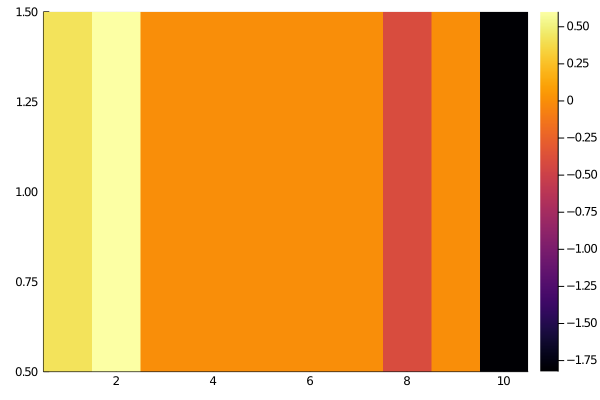

In [39]:
heatmap(G[1:1,:])

In [8]:
@time optimize(M, X, nothing; withqr = true, P = serial)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.321003 seconds (56.81 k allocations: 178.260 MiB, 18.10% gc time)


HermiteMap(10, 100, LinearTransform(100, [-1.9388115412536764, -0.5532840915970996, 0.6649510381692495, 0.8066244424946927, 1.4603598696781142, -1.4589681336803537, -0.9824037374192759, -0.20679245486456055, -1.1291131135026242, 0.6906625282794049  …  -0.37101560389918037, -0.7188384105130516, 1.9141484922491452, -0.41860810828244416, -1.6650320190314736, 1.410747568280138, -1.9536171293522333, 0.2517759861817628, -1.3866687836217055, 0.16619895667801496], [1.003333887605085 0.0 … 0.0 0.0; 0.0 0.889799322434419 … 0.0 0.0; … ; 0.0 0.0 … 1.0213865816432859 0.0; 0.0 0.0 … 0.0 0.9260049299342631], true), MapComponent[MapComponent(10, 10, 1, IntegratedFunction(10, 10, 1, Rectifier("softplus"), ParametricFunction(ExpandedFunction(10, 10, 1, MultiBasis(Basis of 10 functions: Constant -> 8th degree Probabilistic Hermite function
, 1), [1; 2; … ; 9; 10], [0.09564406871613584, -1.5235117095029267, 0.14859370117804918, -4.413286558881069, 0.6568369757672253, -3.796396743470617, 0.7444250305312987

In [ ]:
@time for i=1:Nx
    @show i
    hess_x_log_pdf(M.C[i], X[1:i,:])
end


In [ ]:
@time hess_x_log_pdf(M, X)

i = 1
i = 2
i = 3
i = 

### Integration

In [186]:
Nx = 100
Ny = 50
m = 20
Ne = 400
X = randn(Nx, Ne).*randn(Nx, Ne) #.+ 0.5*randn(Nx).*cos.(randn(Nx, Ne) .* randn(Nx, Ne))

# L = LinearTransform(X)
# transform!(L, X);
# C = MapComponent(m, Nx)
# @time C, _ = optimize(C, X, 10)

In [187]:
M = HermiteMap(m, X);

In [188]:
@time M_noqr = optimize(M, X, 10; P = serial, start = Ny+1);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:13


 19.530544 seconds (69.35 M allocations: 14.972 GiB, 7.45% gc time)


In [189]:
@time M_qr = optimize(M, X, 10; P = serial, withqr = true, start = Ny+1);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:10


 10.677751 seconds (44.03 M allocations: 13.718 GiB, 9.93% gc time)


In [31]:
function timing()
    M = HermiteMap(m, X)
    @btime begin 
        optimize($M, $X, $10; P = serial, withqr = false, start = Ny+1)
    end
    
    @btime begin 
        optimize($M, $X, $10; P = serial, withqr = true, start = Ny+1)
    end
end

timing (generic function with 1 method)

In [32]:
timing();

  11.257 s (42606958 allocations: 13.65 GiB)
  21.346 s (45813192 allocations: 21.12 GiB)


In [11]:
timing();

  14.597 s (42433511 allocations: 13.37 GiB)


In [29]:
timing();

  973.450 ms (1054425 allocations: 1.43 GiB)


In [14]:
methods(update_component)

# 1 method for generic function "update_component":
[1] update_component(C::MapComponent, X, reduced_margin::Array{Int64,2}, S::Storage) in AdaptiveTransportMap at /media/mat/HDD/AdaptiveTransportMap/src/mapcomponent/greedyfit.jl:249

In [30]:
function timing()
    @btime begin 
        M = HermiteMap($m, $X)
        optimize($M, $X, $10; P = thread)
    end
end

timing (generic function with 1 method)

In [88]:
timing();

  297.730 ms (1000725 allocations: 1.35 GiB)


### Test optimization with QR

In [45]:
Nx = 3
Ne = 8
m = 20

idx = [0 0 0; 0 0 1; 0 1 0; 0 1 1; 0 1 2; 1 0 0]


Nψ = 6
coeff = [ 0.20649582065364197;
         -0.5150990160472986;
          2.630096893080717;
          1.13653076177397;
          0.6725837371023421;
         -1.3126095306624133]
C = MapComponent(m, Nx, idx, coeff; α = 1e-6);

Ne = 100


# The QR decomposition is not unique!

X = randn(Nx, Ne) .* randn(Nx, Ne) + cos.(randn(Nx, Ne)) .* exp.(-randn(Nx, Ne).^2)

L = LinearTransform(X)
transform!(L, X)
S = Storage(C.I.f, X)
F = QRscaling(S)
newidx = [1 1 1]

Snew = update_storage(S, X, newidx)
Fupdated = updateQRscaling(F, Snew)

Fnew = QRscaling(Snew)

@test norm(Fupdated.D - Fnew.D)<1e-8
@test norm(Fupdated.Dinv - Fnew.Dinv)<1e-8

Test Passed